In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Reading all the Legal Menu Summary Information
august_summary = pd.read_excel('Legal Menu Summary Reports/August 2024.xlsx', dtype=str, keep_default_na=False)
december_summary = pd.read_excel('Legal Menu Summary Reports/December 2024.xlsx', dtype=str, keep_default_na=False)
february_summary = pd.read_excel('Legal Menu Summary Reports/February 2025.xlsx', dtype=str, keep_default_na=False)
january_summary = pd.read_excel('Legal Menu Summary Reports/January 2025.xlsx', dtype=str, keep_default_na=False)
july_summary = pd.read_excel('Legal Menu Summary Reports/July 2024.xlsx', dtype=str, keep_default_na=False)
june_summary = pd.read_excel('Legal Menu Summary Reports/June 2024.xlsx', dtype=str, keep_default_na=False)
march_summary = pd.read_excel('Legal Menu Summary Reports/March 2025.xlsx', dtype=str, keep_default_na=False)
may_summary = pd.read_excel('Legal Menu Summary Reports/May 2024.xlsx', dtype=str, keep_default_na=False)
november_summary = pd.read_excel('Legal Menu Summary Reports/November 2024.xlsx', dtype=str, keep_default_na=False)
october_summary = pd.read_excel('Legal Menu Summary Reports/October 2024.xlsx')
september_summary = pd.read_excel('Legal Menu Summary Reports/September 2024.xlsx', dtype=str, keep_default_na=False)

In [14]:
def header_cleaning(df):
    df.rename(columns={'Time Zone: (UTC-05:00) Central Daylight Time (America/Chicago)': 'Legal_Menu_Option',
                       'Time Zone: (UTC-06:00) Central Standard Time (America/Chicago)': 'Legal_Menu_Option',
                       'Unnamed: 1': 'Menu_Selection',
                       'Unnamed: 2': 'Queue_Selection',
                       'Unnamed: 3': 'Group_Suboption',
                       'Unnamed: 4': 'Final_Queue_Name',
                       'Unnamed: 5': 'Total_Calls',
                       'Unnamed: 6': 'Live_Queued_Calls',
                       'Unnamed: 7': 'Callback_Queued_Calls',
                       'Unnamed: 8': 'Closed_Queue_Calls',
                       'Unnamed: 9': 'Abandoned_Calls'
                       }, inplace= True)
    df = df.iloc[2:]
    df.replace('', pd.NA, inplace=True)
    df.fillna(method='ffill', inplace=True)
    df.reset_index(inplace = True, drop = True)
    return df

In [15]:
january_summary = header_cleaning(january_summary)
february_summary = header_cleaning(february_summary)
march_summary = header_cleaning(march_summary)
may_summary = header_cleaning(may_summary)
june_summary = header_cleaning(june_summary)
july_summary = header_cleaning(july_summary)
august_summary = header_cleaning(august_summary)
september_summary = header_cleaning(september_summary)
october_summary = header_cleaning(october_summary)
november_summary = header_cleaning(november_summary)

all_datasets = [january_summary, february_summary, march_summary, may_summary, june_summary, july_summary, august_summary, september_summary, october_summary, november_summary]

In [16]:
def top_five_usages(df):
    return df.sort_values(by = 'Total_Calls', ascending = False).head()

def bottom_five_usages(df):
    return df.sort_values(by = 'Total_Calls', ascending = True).head()


In [17]:
top_five_usages(november_summary)

,Legal_Menu_Option,Menu_Selection,Queue_Selection,Group_Suboption,Final_Queue_Name,Total_Calls,Live_Queued_Calls,Callback_Queued_Calls,Closed_Queue_Calls,Abandoned_Calls
28,Criminal Records,N/A,N/A,N/A,Criminal Records Voicemail Transfer,96,0,0.0,0,4
77,Family,Simple Divorce,Family,Divorce with DV,Clinic Voicemail Transfer,9,0,0.0,9,2
131,Immigration,N/A,Immigration,Naturalization,N/A,9,0,0.0,9,9
177,Pre-Legal Seniors,N/A,SubSenior Family,SubSenior Family,N/A,9,0,0.0,7,9
63,Family,N/A,Family,DCFS,N/A,87,0,0.0,87,85


In [46]:
combined_total_calls = pd.DataFrame(columns = ['Legal_Menu_Option', 'Menu_Selection', 'Queue_Selection', 'Final_Queue_Name', 'Total_Calls'])

one_call = pd.DataFrame(columns = ['Legal_Menu_Option', 'Menu_Selection', 'Queue_Selection', 'Final_Queue_Name'])

for dataset in all_datasets:
    dataset = dataset[:len(dataset) - 1]
    combined_total_calls = pd.concat([combined_total_calls, dataset[['Legal_Menu_Option', 'Menu_Selection', 'Queue_Selection', 'Final_Queue_Name', 'Total_Calls']]], axis = 0)

    one_call = pd.concat([one_call, dataset.loc[dataset['Total_Calls'] == '1', ['Legal_Menu_Option', 'Menu_Selection', 'Queue_Selection', 'Final_Queue_Name']]], axis = 0)

In [64]:
# In general, what is the usage rate of various options on the menu – what is high usage, low/no usage.

# top options

combined_total_calls['Total_Calls'] = combined_total_calls['Total_Calls'].apply(lambda x: int(x))
legal_menu_option_rates = combined_total_calls[['Legal_Menu_Option', 'Total_Calls']].groupby(['Legal_Menu_Option'], as_index= False).sum()
menu_selection_rates = combined_total_calls[['Legal_Menu_Option', 'Menu_Selection', 'Total_Calls']].groupby(['Legal_Menu_Option', 'Menu_Selection'], as_index= False).sum()
queue_selection_rates = combined_total_calls[['Legal_Menu_Option', 'Menu_Selection', 'Queue_Selection', 'Total_Calls']].groupby(['Legal_Menu_Option', 'Menu_Selection', 'Queue_Selection'], as_index= False).sum()
final_queue_rates = combined_total_calls.groupby(['Legal_Menu_Option', 'Menu_Selection', 'Queue_Selection', 'Final_Queue_Name'], as_index= False).sum()

In [65]:
legal_menu_option_rates.columns

Index(['Legal_Menu_Option', 'Total_Calls'], dtype='object')

In [90]:
queue_selection_rates.sort_values(by = 'Total_Calls', ascending = False)

,Legal_Menu_Option,Menu_Selection,Queue_Selection,Total_Calls
53,Family,N/A,Family,7973
105,Legal,N/A,N/A,7605
14,Benefits,N/A,Benefits,3450
79,Housing,N/A,Housing,3209
111,Other Legal,All Other Issues,N/A,3098
...,...,...,...,...
66,HIV,Personal Injury,Family,1
70,Housing,Child Support,Consumer,1
98,Legal,Housing Other,Consumer,1
114,Other Legal,Housing Other,N/A,1


<Figure size 1000x800 with 0 Axes>

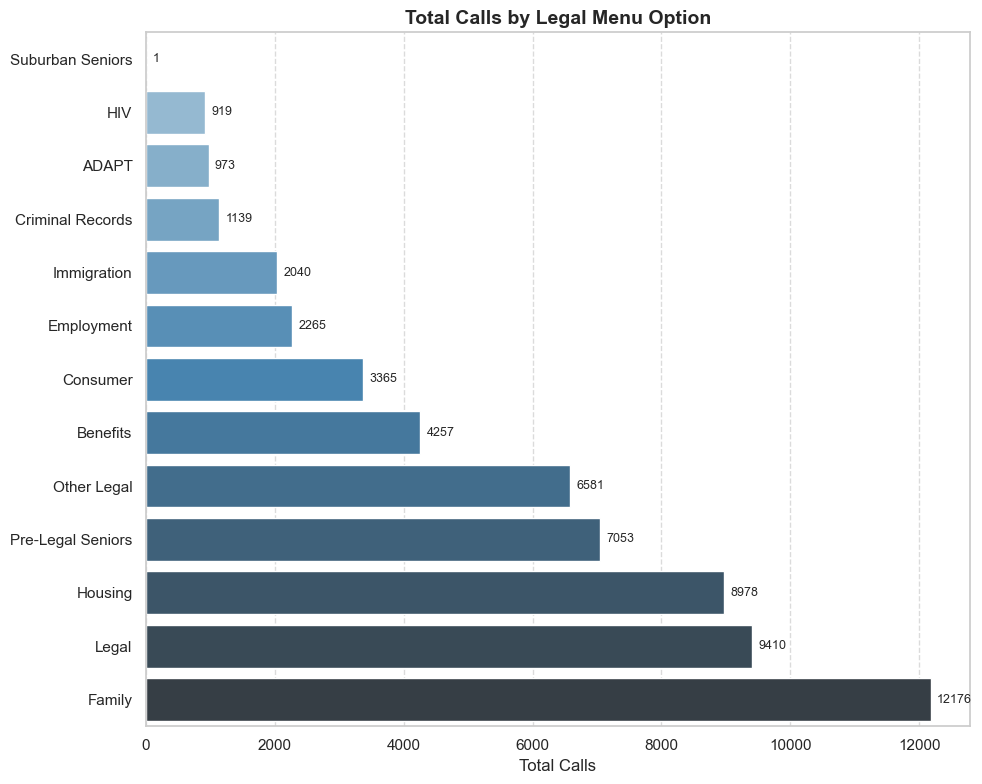

In [74]:
import seaborn as sns

def option_usage_plot(dataset):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 8))

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 8))

    # Barplot
    barplot = sns.barplot(
        x="Total_Calls",
        y="Legal_Menu_Option",
        data=dataset.sort_values(by = "Total_Calls", ascending= True),
        palette="Blues_d"
    )

    # Add labels to each bar
    for bar in barplot.patches:
        width = bar.get_width()
        plt.text(width + 100,  # shift right slightly
                bar.get_y() + bar.get_height() / 2,
                f'{int(width)}',
                va='center', fontsize=9)

    # Title and axis labels
    plt.title("Total Calls by Legal Menu Option", fontsize=14, weight='bold')
    plt.xlabel("Total Calls", fontsize=12)
    plt.ylabel("")

    # Layout and grid
    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

option_usage_plot(legal_menu_option_rates)

<Figure size 1400x900 with 0 Axes>

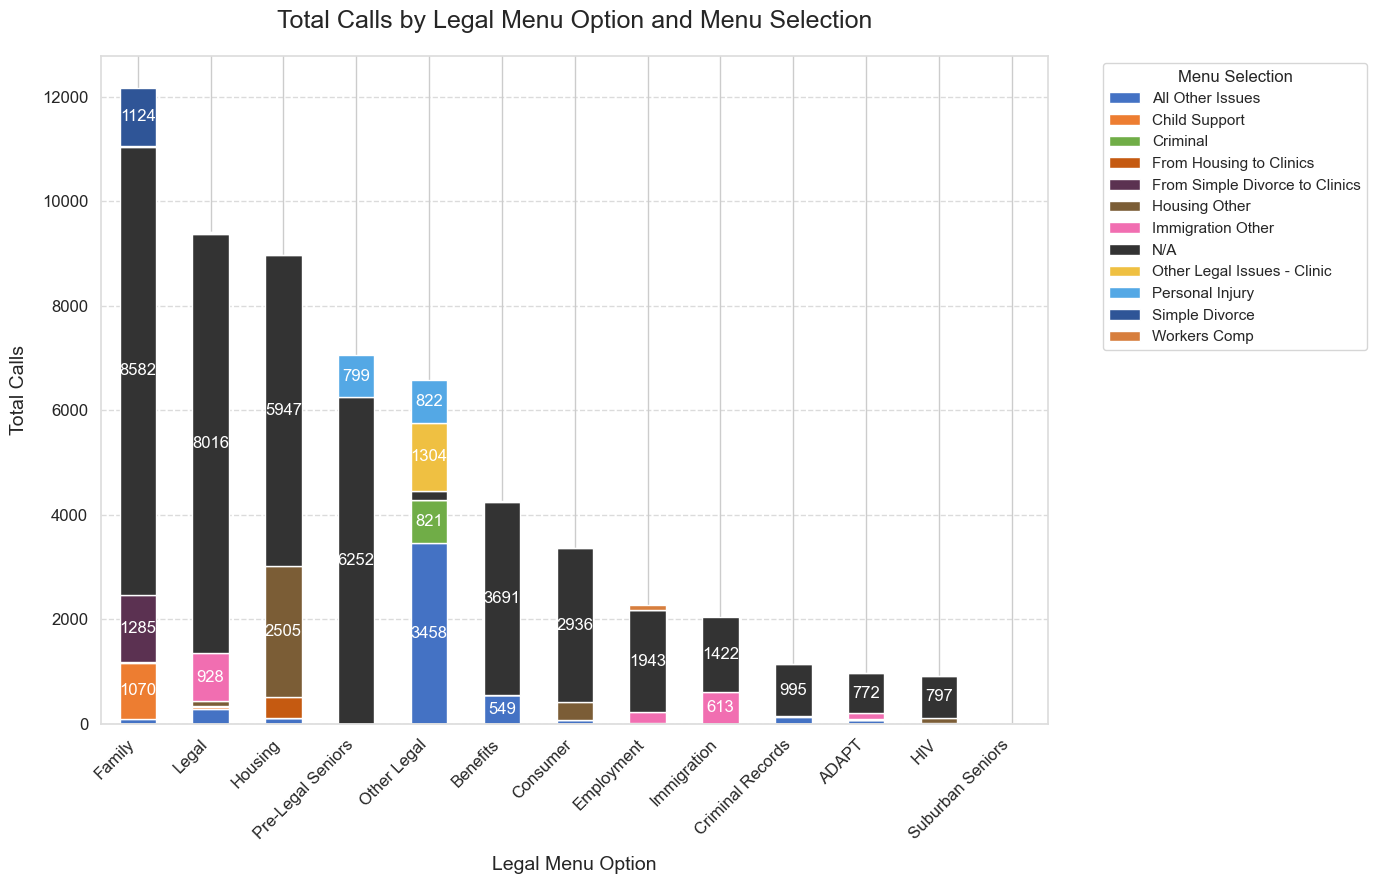

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Assuming menu_selection_rates is your original DataFrame
# If you need to recreate it from the sample data I can provide code for that

# Set the style with seaborn for a more modern look
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Create a figure with slightly larger size
plt.figure(figsize=(14, 9))

# Group by Legal_Menu_Option and Menu_Selection, sum Total_Calls (from your original code)
grouped = menu_selection_rates.groupby(['Legal_Menu_Option', 'Menu_Selection'])['Total_Calls'].sum().unstack()

# Calculate total calls per menu option for sorting
totals = grouped.sum(axis=1)
grouped = grouped.loc[totals.sort_values(ascending=False).index]

# Fill NaN values with 0 for clean plotting
grouped = grouped.fillna(0)

# Define a better color palette (matching the original categories but with improved colors)
colors = {
    'All Other Issues': '#4472C4',
    'Child Support': '#ED7D31',
    'Criminal': '#70AD47',
    'From Housing to Clinics': '#C55A11',
    'From Simple Divorce to Clinics': '#5B3151',
    'Housing Other': '#7B5D36',
    'Immigration Other': '#F16EB1',
    'NA': '#A5A5A5',
    'Other Legal Issues - Clinic': '#EFC042',
    'Personal Injury': '#54A8E5',
    'Simple Divorce': '#2F5597',
    'Workers Comp': '#D77E3D'
}

# Create a color list that matches the column order in grouped
color_list = [colors.get(cat, '#333333') for cat in grouped.columns]

# Plot the data with the custom colors
ax = grouped.plot(kind='bar', stacked=True, figsize=(14, 9), color=color_list)

# Add data labels to the larger segments (optional)
# This adds values to segments that are large enough to contain text
for i, (name, values) in enumerate(grouped.iterrows()):
    bottom = 0
    for j, val in enumerate(values):
        if val > 500:  # Only label segments with more than 500 calls
            plt.text(i, bottom + val/2, int(val), 
                     ha='center', va='center', 
                     color='white')
        bottom += val

# Customize the plot
plt.title('Total Calls by Legal Menu Option and Menu Selection', fontsize=18, pad=20)
plt.xlabel('Legal Menu Option', fontsize=14, labelpad=10)
plt.ylabel('Total Calls', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines only for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot for better readability
plt.legend(title='Menu Selection', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)

# Add a subtle box around the plot
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
for spine in ax.spines.values():
    spine.set_color('#DDDDDD')

# Ensure tight layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
def abandon_closed_queue_corr(dataset):
    dataset['Closed_Queue_Calls'] = dataset['Closed_Queue_Calls'].astype(int)
    dataset['Abandoned_Calls'] = dataset['Abandoned_Calls'].astype(int)
    return np.corrcoef(dataset['Abandoned_Calls'], dataset['Closed_Queue_Calls'])


In [21]:
abandoned_closed_queue = pd.DataFrame(columns=['Month', 'Correlation'])
months = ['January', 'February', 'March', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
i = 0

for dataset in all_datasets:
    dataset = dataset[:len(all_datasets[i]) - 1]
    new_row = pd.DataFrame({
        'Month': [months[i]], 
        'Correlation': [abandon_closed_queue_corr(dataset)[0][1]]
    })
    abandoned_closed_queue = pd.concat([abandoned_closed_queue, new_row], axis=0, ignore_index=True)
    i += 1


In [102]:
# Reading all the All Calls by Month Data
august_calls = pd.read_excel('All Calls by Month/August 2024.xlsx', keep_default_na=False)
december_calls = pd.read_excel('All Calls by Month/December 2024.xlsx', keep_default_na=False)
february_calls = pd.read_excel('All Calls by Month/February 2025.xlsx', keep_default_na=False)
january_calls = pd.read_excel('All Calls by Month/January 2025.xlsx', keep_default_na=False)
july_calls = pd.read_excel('All Calls by Month/July 2024.xlsx', keep_default_na=False)
march_calls = pd.read_excel('All Calls by Month/March 2025.xlsx', keep_default_na=False)
#november_calls = pd.read_excel('All Calls by Month/November 2024.xlsx', dtype=str, keep_default_na=False)
october_calls = pd.read_excel('All Calls by Month/October 2024.xlsx', keep_default_na=False)

In [98]:
august_calls.head()

,Start time,Answer time,Duration,Called number,Correlation ID,Location,Inbound trunk,Outbound trunk,Route group,Direction,...,Final local sessionID,Final remote sessionID,Answer Indicator,Ring duration,Release time,Report time,PSTN legal entity,PSTN vendor Org ID,PSTN vendor name,PSTN provider ID
0,2024-08-31T23:48:58.458Z,2024-08-31T23:48:58.592Z,55,13123411070,f20bb338-8e74-44df-944b-d42bb3635cb8,HQ,NA,wcc_Pc_tp-ipRwm_ku064NHZiw,NA,TERMINATING,...,5ebb8d750080439c8a61fd29f2a9d025,NA,Yes,0,2024-08-31T23:49:54.166Z,2024-08-31T23:49:54.166Z,NA,NA,CallTower,afc59c71-23c9-4884-bab9-535f916eb11b
1,2024-08-31T23:48:09.419Z,2024-08-31T23:48:09.447Z,5,13123478300,3de1e4d1-70b8-4a17-b6ae-564e524fee57,HQ,NA,NA,NA,TERMINATING,...,0108b5df2c2d4269b6314f9944df6225,NA,Yes,0,2024-08-31T23:48:15.050Z,2024-08-31T23:48:15.050Z,NA,NA,NA,NA
2,2024-08-31T23:48:09.419Z,2024-08-31T23:48:09.447Z,5,13123478300,3de1e4d1-70b8-4a17-b6ae-564e524fee57,HQ,NA,NA,NA,ORIGINATING,...,0108b5df2c2d4269b6314f9944df6225,0,Yes,0,2024-08-31T23:48:15.050Z,2024-08-31T23:48:15.050Z,NA,NA,NA,NA
3,2024-08-31T23:48:09.416Z,2024-08-31T23:48:09.447Z,5,13123478302,3de1e4d1-70b8-4a17-b6ae-564e524fee57,HQ,NA,NA,NA,TERMINATING,...,0,0108b5df2c2d4269b6314f9944df6225,Yes-PostRedirection,0,2024-08-31T23:48:15.050Z,2024-08-31T23:48:15.050Z,NA,NA,CallTower,afc59c71-23c9-4884-bab9-535f916eb11b
4,2024-08-31T23:30:45.191Z,2024-08-31T23:30:45.304Z,44,13123411070,de39c993-24c5-4378-9768-e2ea60994f1f,HQ,NA,wcc_Pc_tp-ipRwm_ku064NHZiw,NA,TERMINATING,...,1cca8de500804fafb320d6ebf0b47b21,NA,Yes,0,2024-08-31T23:31:30.079Z,2024-08-31T23:31:30.079Z,NA,NA,CallTower,afc59c71-23c9-4884-bab9-535f916eb11b


In [105]:
august_calls.head()
all_call_datasets = [january_calls, february_calls, march_calls, july_calls, august_calls, october_calls, december_calls]

for df in all_call_datasets:
    df['Start time'] = pd.to_datetime(df['Start time'])

In [106]:
def most_frequent_hour(df):
    # Convert to datetime if it's not already
    df["Start time"] = pd.to_datetime(df["Start time"], errors='coerce')
    df = df.dropna(subset=["Start time"])    
    hours = df["Start time"].dt.hour  
    most_common = hours.mode()
    
    return most_common[0] if not most_common.empty else None

In [107]:
common_hrs_per_month = pd.DataFrame(columns=['Month', 'Hour'])
call_months = ['January', 'February', 'March', 'July', 'August', 'October', 'December']
i = 0

for dataset in all_call_datasets:
    new_row = pd.DataFrame({'Month': [call_months[i]], 'Hour': [f'{most_frequent_hour(dataset)}:00 - {most_frequent_hour(dataset) + 1}:00']})
    common_hrs_per_month = pd.concat([common_hrs_per_month, new_row], axis= 0, ignore_index= True)
    i += 1

common_hrs_per_month

,Month,Hour
0,January,16:00 - 17:00
1,February,17:00 - 18:00
2,March,16:00 - 17:00
3,July,15:00 - 16:00
4,August,15:00 - 16:00
5,October,15:00 - 16:00
6,December,15:00 - 16:00


In [108]:
def hourly_frequency(df):
    # Ensure datetime format
    df["Start time"] = pd.to_datetime(df["Start time"], errors='coerce')
    df = df.dropna(subset=["Start time"])
    
    # Extract hour
    hours = df["Start time"].dt.hour
    hour_counts = hours.value_counts().sort_index()
    
    # Build time range labels
    hour_labels = [f'{h}:00 - {h+1}:00' for h in hour_counts.index]
    
    # Construct result DataFrame
    result = pd.DataFrame({
        'Hour': hour_labels,
        'Frequency': hour_counts.values
    })
    
    return result

In [109]:
august_hourly_frequency = hourly_frequency(august_calls)
december_hourly_frequency = hourly_frequency(december_calls)
february_hourly_frequency = hourly_frequency(february_calls)
january_hourly_frequency = hourly_frequency(january_calls)
july_hourly_frequency = hourly_frequency(july_calls)
march_hourly_frequency = hourly_frequency(march_calls)
october_hourly_frequency = hourly_frequency(october_calls)

In [110]:
august_hourly_frequency

,Hour,Frequency
0,0:00 - 1:00,327
1,1:00 - 2:00,209
2,2:00 - 3:00,140
3,3:00 - 4:00,60
4,4:00 - 5:00,47
5,5:00 - 6:00,43
6,6:00 - 7:00,30
7,7:00 - 8:00,13
8,8:00 - 9:00,8
9,9:00 - 10:00,162


In [113]:
all_hr_freq = [august_hourly_frequency, december_hourly_frequency, february_hourly_frequency, january_hourly_frequency, july_hourly_frequency, march_hourly_frequency, october_hourly_frequency]
all_hours = pd.DataFrame(columns=['Hour', 'Frequency'])

for dataset in all_hr_freq:
    all_hours = pd.concat([all_hours, dataset], axis = 0)

all_hours = all_hours.groupby('Hour', as_index= False).sum()

In [114]:
all_hours.sort_values(by = 'Frequency', ascending= True)

,Hour,Frequency
22,8:00 - 9:00,110
21,7:00 - 8:00,165
19,5:00 - 6:00,254
23,9:00 - 10:00,309
20,6:00 - 7:00,321
18,4:00 - 5:00,339
1,10:00 - 11:00,433
17,3:00 - 4:00,613
2,11:00 - 12:00,848
16,2:00 - 3:00,882


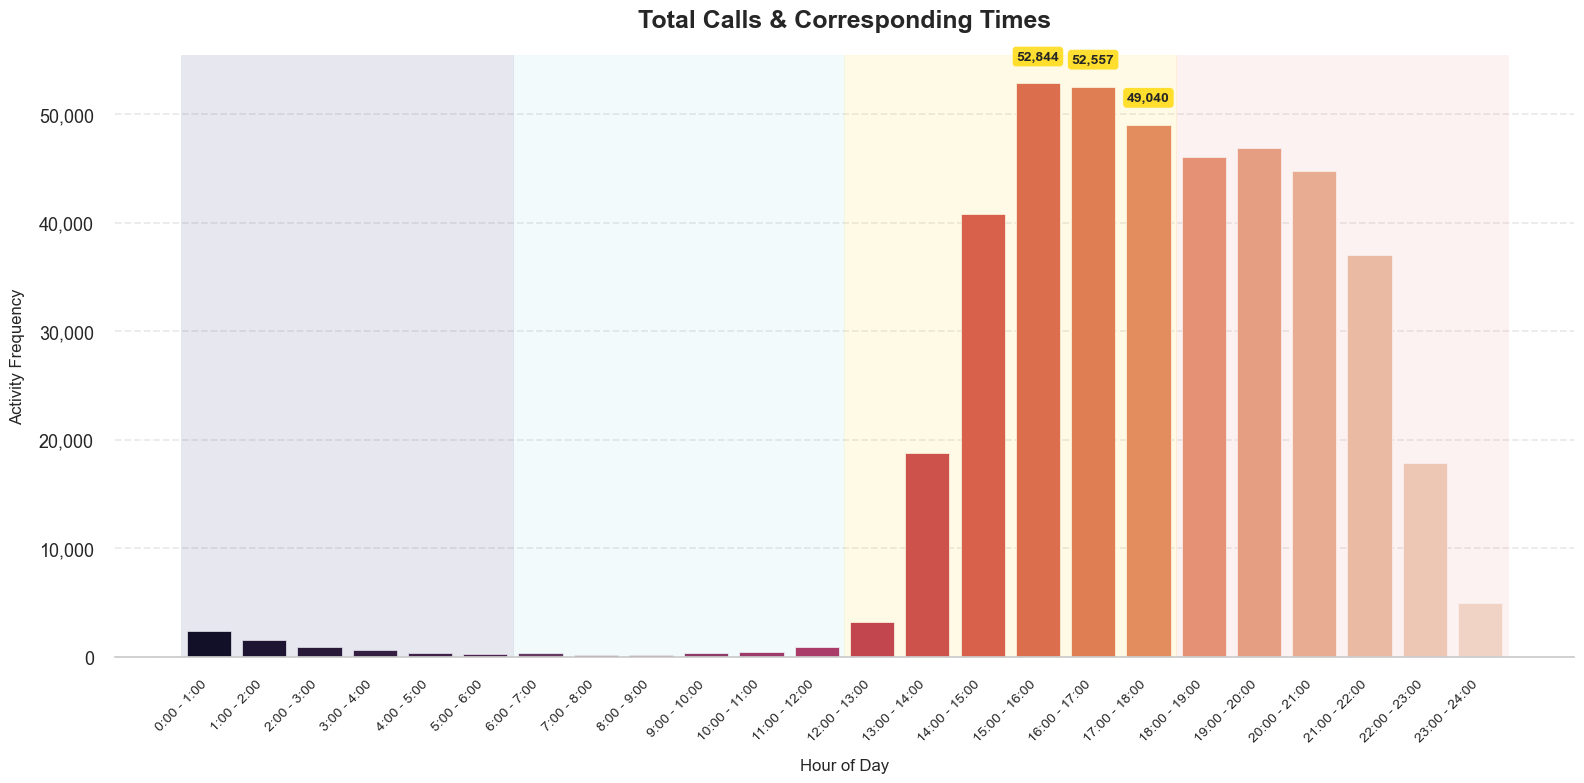

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Sample data (replace with pd.read_csv() for your actual data)
data = {
    'Time Range': ['8:00 - 9:00', '7:00 - 8:00', '5:00 - 6:00', '9:00 - 10:00', '6:00 - 7:00',
                  '4:00 - 5:00', '10:00 - 11:00', '3:00 - 4:00', '11:00 - 12:00', '2:00 - 3:00',
                  '1:00 - 2:00', '0:00 - 1:00', '12:00 - 13:00', '23:00 - 24:00', '22:00 - 23:00',
                  '13:00 - 14:00', '21:00 - 22:00', '14:00 - 15:00', '20:00 - 21:00', '18:00 - 19:00',
                  '19:00 - 20:00', '17:00 - 18:00', '16:00 - 17:00', '15:00 - 16:00'],
    'Frequency': [110, 165, 254, 309, 321, 339, 433, 613, 848, 882, 1537, 2378, 3154, 
                 4942, 17823, 18726, 36986, 40783, 44749, 46068, 46933, 49040, 52557, 52844]
}

df = pd.DataFrame(data)

# Extract start time and convert to datetime for proper sorting
df['Start Time'] = df['Time Range'].str.extract(r'(\d+:\d+)')
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%H:%M')
df = df.sort_values('Start Time')

# Set style
plt.style.use('seaborn-v0_8-talk')  # Professional presentation style
sns.set_palette("rocket")  # Color gradient for time data

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Plot with enhanced aesthetics
sns.barplot(data=df, x='Time Range', y='Frequency', 
           palette="rocket", ax=ax, edgecolor='white', linewidth=0.5)

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

# Highlight top 3 busiest hours
top3 = df.nlargest(3, 'Frequency')
for _, row in top3.iterrows():
    ax.annotate(f"{row['Frequency']:,}", 
               (row['Time Range'], row['Frequency']),
               xytext=(0, 15), textcoords='offset points',
               ha='center', va='bottom',
               fontsize=10, weight='bold',
               bbox=dict(boxstyle='round,pad=0.3', fc='gold', alpha=0.8))

# Add time-of-day background shading
for i in range(0, 24, 6):
    ax.axvspan(i-0.5, i+5.5, alpha=0.1, color=['midnightblue', 'skyblue', 'gold', 'lightcoral'][i//6])

# Customize ticks and labels
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df['Time Range'], rotation=45, ha='right', fontsize=10)
plt.xlabel('Hour of Day', fontsize=12, labelpad=10)
plt.ylabel('Activity Frequency', fontsize=12, labelpad=10)

# Add titles and annotations
plt.title('Total Calls & Corresponding Times', fontsize=18, pad=20, weight='bold')

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

# Remove unnecessary spines
sns.despine(left=True)

plt.tight_layout()
plt.savefig('daily_activity_pattern.png', dpi=300, bbox_inches='tight')
plt.show()